### Exercise 1

#### 1. Describe the steps required for performing PCA. How SVD can be used within this process?

The Principal Component Analysis is a dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional representation, by means of linear combinations of vectors that are directed in the directions where variance is maximized, in descending order: this means that the vector related to the first principal component is the direction of maximum variance in the dataset, the vector related to the second principal component is the second direction where variance is maximized, and so on.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Observe matrix containing dataset to understand which are the features and samples: how they are disposed
np.random.seed(0)
A = np.random.randn(4,10) * 5
print('%d features' % A.shape[0])
print('%d samples'  % A.shape[1])
A
pd.DataFrame(A)

4 features
10 samples


,0,1,2,3,4,5,6,7,8,9
0,8.820262,2.000786,4.893690,11.204466,9.337790,-4.886389,4.750442,-0.756786,-0.516094,2.052993
1,0.720218,7.271368,3.805189,0.608375,2.219316,1.668372,7.470395,-1.025791,1.565339,-4.270479
2,-12.764949,3.268093,4.322181,-3.710825,11.348773,-7.271828,0.228793,-0.935919,7.663896,7.346794
3,0.774737,1.890813,-4.438929,-9.903982,-1.739561,0.781745,6.151453,6.011899,-1.936634,-1.511514


In [4]:
# NORMALIZE IT 
np.mean(A, axis=1) # computes the mean of each row and put in an array with length equal to the number of rows

array([ 3.69011585,  2.00323008,  0.94950078, -0.39199724])

In [5]:
A - np.mean(A, axis=1)[:, None]

array([[  5.13014588,  -1.68932981,   1.20357407,   7.51435014,
          5.6476741 ,  -8.57650525,   1.06032623,  -4.4469019 ,
         -4.20621011,  -1.63712334],
       [ -1.28301222,   5.26813746,   1.80195855,  -1.39485499,
          0.21608609,  -0.33485844,   5.46716529,  -3.02902139,
         -0.43789157,  -6.27370877],
       [-13.71444986,   2.3185922 ,   3.37268021,  -4.66032588,
         10.39927234,  -8.22132915,  -0.72070819,  -1.88542003,
          6.71439529,   6.39729307],
       [  1.16673437,   2.28280984,  -4.04693149,  -9.5119851 ,
         -1.3475635 ,   1.17374209,   6.54345065,   6.40389649,
         -1.54463684,  -1.11951651]])

In [6]:
A_norm = (A - np.mean(A, axis=1)[:, None]) / np.std(A, axis=1)[:, None]

In [7]:
# Compute the SVD of the normalized matrix, this is the PCA
U, s, VT = np.linalg.svd(A_norm, full_matrices=False)

---

#### 2. Suppose you perform PCA on a 2D dataset and it yields 2 eigenvalues which are equal. 
- **What does it mean concerning the importance of the dimension?**
  - Equal eigenvalues indicate that the two principal components explain the same amount of variance.
  - There is no clear dominant direction, suggesting the dataset has **no strong intrinsic orientation**.

- **Would pursuing a dimensionality reduction be a good choice? Why?**
  - Dimensionality reduction might **not** be effective here because both dimensions contribute equally to the variance.
  - Reducing to 1D would result in a significant loss of information.

---



#### 3. Draw a dataset with two eigenvalues of the same size.
- A circular dataset (or a uniformly distributed dataset with equal spread along both axes) will yield two eigenvalues of the same size.



To draw a dataset with two eigenvalues of the same size, you need to create data that is evenly spread in all directions around a central point, such as points forming a circle or a uniformly distributed blob in a 2D space.

(100,)
(500,)
(500, 2)
[12.84523258 12.84523258]


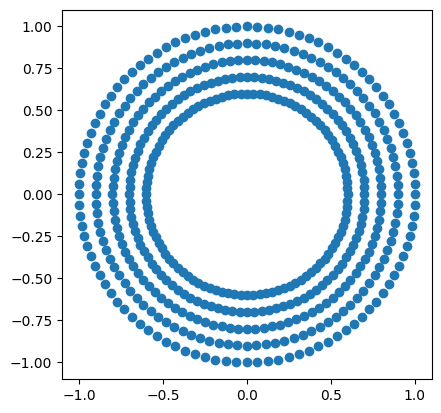

In [8]:
import numpy as np
import matplotlib.pyplot as plt

sampling = np.arange(0, 2 * np.pi, np.pi / 50)
print(sampling.shape)


X = np.cos(sampling)
Y = np.sin(sampling)
for i in range(4):
    X = np.concatenate([X, np.cos(sampling) * (1 - (i + 1) / 10)])
    Y = np.concatenate([Y, np.sin(sampling) * (1 - (i + 1) / 10)])
print(X.shape)


A = np.column_stack([X, Y])
print(A.shape)

_, s, _ = np.linalg.svd(A)
print(s)

plt.scatter(X, Y)
plt.gca().set_aspect("equal")

A circular dataset is symmetric, meaning the spread of points is identical in all directions.
This symmetry results in equal variances along principal components, producing two eigenvalues of the same size.

---


#### 4. Suppose now you have performed a PCA on a 2D dataset and you get the eigenvalues 6 and 2.
- **Draw a distribution of sample points that may give rise to these results.**
  - A dataset with an elongated shape along one axis (e.g., a cigar-shaped cloud of points) corresponds to these eigenvalues.
- **Also draw the eigenvectors.**
  - The eigenvector corresponding to the eigenvalue 6 points along the elongated direction.
  - The eigenvector corresponding to the eigenvalue 2 is orthogonal to the first and points along the narrower direction.


[5.85383535 1.97236799]
[2.41947006 1.40441019]


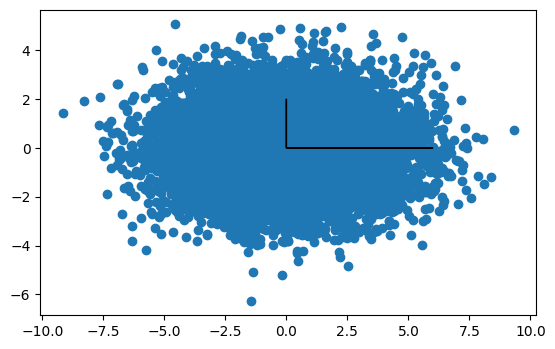

In [11]:
np.random.seed(0)
n_samples = 10000
X = np.random.normal(loc=0.0, scale=np.sqrt(6), size=(n_samples))
Y = np.random.normal(loc=0.0, scale=np.sqrt(2), size=(n_samples))
# loc: the mean of the normal distribution is 0. This centers the data around the origin
# scale = np.sqrt(value): the std is the square root of value, ensuring that the spread of data along the axis corresponds to variance of 'value'
A = np.column_stack([X, Y])

print(np.linalg.eigvals((A.T @ A) / n_samples))
_, s, _ = np.linalg.svd(A, full_matrices=False)
print(s / np.sqrt(n_samples))

plt.scatter(X, Y)
plt.arrow(0, 0, 6, 0)
plt.arrow(0, 0, 0, 2)
plt.gca().set_aspect("equal")

[[4.94117647 1.76470588]
 [1.76470588 3.05882353]]
(100000, 2)
[[5.56214818 1.2426036 ]
 [1.2426036  2.41793871]]


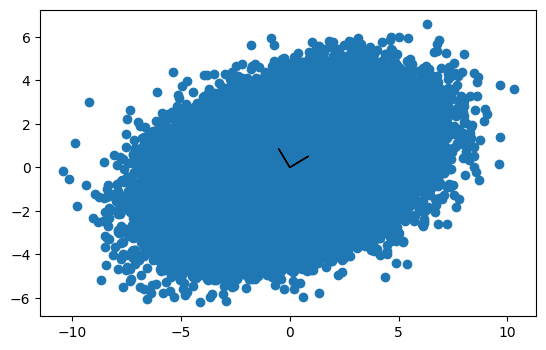

In [21]:
n_samples = 100000
eigv1 = np.array([15,9])
eigv2 = np.array([-9,15])

eigv1 = eigv1 / np.linalg.norm(eigv1) # normalization to ensure lengths are 1: crucial because eigvectors represent directions, not magnitudes
eigv2 = eigv2 / np.linalg.norm(eigv2)

S = np.diag([6, 2])
W = np.column_stack([eigv1, eigv2])
C = W @ S @ W.T
print(C)

np.random.seed(0)
A = np.linalg.cholesky(C)
sampling_points = np.random.randn(n_samples, 2)
X = sampling_points @ A
print(X.shape)

cov = np.cov(X.T)
print(cov)

plt.scatter(X[:, 0], X[:, 1])
plt.arrow(0, 0, eigv1[0], eigv1[1])
plt.arrow(0, 0, eigv2[0], eigv2[1])
plt.gca().set_aspect("equal")

[774.20577646 445.66759347]
(100000, 2)


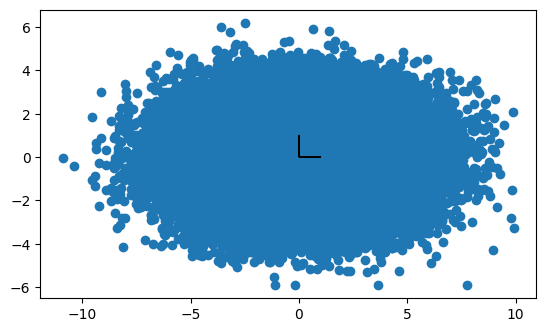

In [16]:
U, s, VT = np.linalg.svd(X, full_matrices=False)
print(s)
PHI = U @ np.diag(s)

print(PHI.shape)
plt.scatter(PHI[:, 0], PHI[:, 1])
plt.arrow(0, 0, 1, 0)
plt.arrow(0, 0, 0, 1)
plt.gca().set_aspect("equal")

In [22]:
print("Eigenvalues obtained after having performed the PCA on the data:")
print(np.linalg.eigvals(X.T @ X) / (n_samples - 1))
print("Which is basically the couple (6, 2) that we wanted")

Eigenvalues obtained after having performed the PCA on the data:
[5.99400578 1.9862159 ]
Which is basically the couple (6, 2) that we wanted


---



#### 5. Consider the following 3 data points in the 2D space: (-1, 1), (0, 0), and (1, 1).
- **What’s the first principal component of the given dataset?**
  - Compute the mean of the data:
    $$
    \text{mean} = (0, \frac{2}{3}).
    $$
  - Center the data by subtracting the mean.
  - Compute the covariance matrix and its eigenvectors.
  - The first principal component corresponds to the eigenvector of the largest eigenvalue.



Centered data
[[-1.          0.33333333]
 [ 0.         -0.66666667]
 [ 1.          0.33333333]]
Covariance matrix
[[0.66666667 0.        ]
 [0.         0.22222222]]


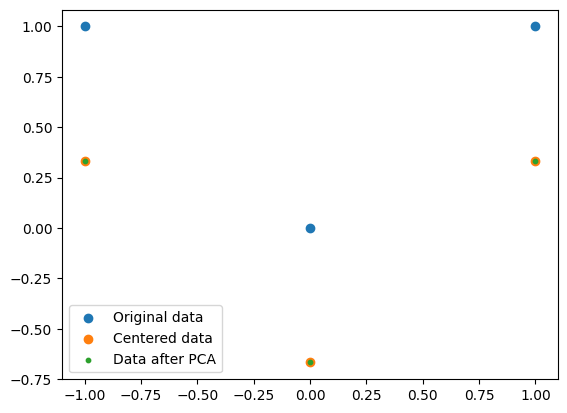

In [23]:
p1 = np.array([-1, 1])
p2 = np.array([0, 0])
p3 = np.array([1, 1])

data = np.row_stack([p1, p2, p3])

plt.scatter(data[:, 0], data[:, 1], label="Original data")

# Centralize data
data_mean = np.mean(data, axis=0)
data = data - data_mean[np.newaxis, :]
print("Centered data")
print(data)
# covariance matrix
c = data.T @ data / 3
print("Covariance matrix")
print(c)

plt.scatter(data[:, 0], data[:, 1], label="Centered data")

# Apply SVD to the centralized data
U, s, VT = np.linalg.svd(data, full_matrices=False)

PHI = U @ np.diag(s)

plt.scatter(PHI[:, 0], PHI[:, 1], s=10, label="Data after PCA")
plt.legend()

---

#### 6. If you project the original data points onto the 1D subspace spanned by the principal component:
- **What are their coordinates in this subspace?**
  - Project each data point onto the first principal component using the formula:
    $$
    \text{Projection} = X \cdot \text{PC}_1,
    $$
    where \( \text{PC}_1 \) is the first principal component.

- **What is the variance of the projected data?**
  - Compute the variance of the projected points.

In [24]:
# Project original data onto the 1D subspace
proj = data @ VT[:, 0]
print("Coordinates of the points in the subspace spanned by the principal component")
print(proj)
print("Variance of the projected data")
print(np.var(proj))

Coordinates of the points in the subspace spanned by the principal component
[-1.  0.  1.]
Variance of the projected data
0.6666666666666666


---

The reconstruction error is: 0.82


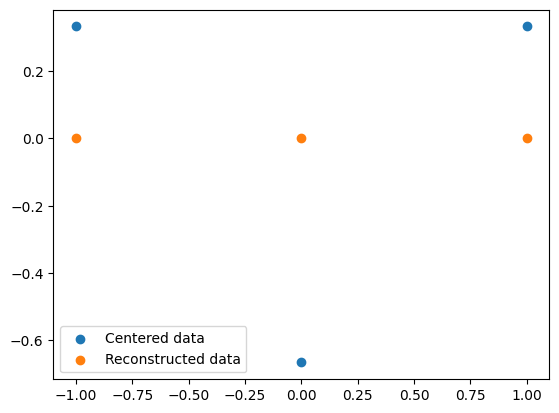

In [25]:
plt.scatter(data[:, 0], data[:, 1], label="Centered data")
reconstructed_data = np.column_stack([proj, np.zeros(proj.shape)])
plt.scatter(
    reconstructed_data[:, 0], reconstructed_data[:, 1], label="Reconstructed data"
)
plt.legend()

reconsutruction_error = np.linalg.norm(reconstructed_data - data)
print("The reconstruction error is: %1.2f" % reconsutruction_error)